<a href="https://colab.research.google.com/github/vrige/Car_classification/blob/main/Car_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from PIL import Image

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.8.2


In [3]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [27]:
# %cd /gdrive/My Drive
# new_dir = "deep_learning_selfprojects"
# if not os.path.isfile(new_dir):
#   os.mkdir(new_dir)
# print(os.listdir(new_dir))
# %cd /gdrive/My Drive/deep_learning_selfprojects
# dirname = "Car_classification"
# if not os.path.isfile(dirname):
#    os.mkdir(dirname)

In [4]:
%cd /gdrive/My Drive/deep_learning_selfprojects/Car_classification

/gdrive/My Drive/deep_learning_selfprojects/Car_classification


In [5]:
pwd

'/gdrive/My Drive/deep_learning_selfprojects/Car_classification'

In [ ]:
# !unzip archive.zip

In [6]:
# # For merging the training and test sets -> I want to make a better cut 
# # Doing first an undersampling and then applying data augmentation

dataset_dir = 'Cars Dataset'
training_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')
labels = os.listdir(training_dir)
labels

# # To move all the dirs inside the training set to the parent folder
# import shutil
# for label in labels:
#   shutil.move(os.path.join(training_dir,label), dataset_dir)

# # To move all the images inside the dirs inside the test set to the corresponding
# # dir in the dataset_dir folder
# for label in labels:
#   label_dir = os.path.join(test_dir, label)
#   image_list = os.listdir(label_dir)
#   for image in image_list:
#     shutil.move(os.path.join(label_dir,image), os.path.join(dataset_dir,label))

# # remove the old train and old set
# shutil.rmtree(training_dir)
# shutil.rmtree(test_dir)

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

In [131]:
# # Undersampling
# from random import shuffle

# # training_dir = os.path.join(dataset_dir, 'train')
# # validation_dir = os.path.join(dataset_dir, 'val')
# # test_dir = os.path.join(dataset_dir, 'test')

# labels = os.listdir(dataset_dir)
# my_list = []
# for label in labels:
#   my_list.append(len(os.listdir(os.path.join(dataset_dir, label))))
# print(my_list)

# min = np.min(my_list)

# for label in labels:
#   label_dir = os.path.join(dataset_dir, label)
#   image_list = os.listdir(label_dir)
#   shuffle(image_list)
#   print(image_list)
#   for image in image_list[min:]:
#     os.remove(os.path.join(label_dir,image))


[1013, 338, 391, 385, 526, 547, 965]
['319.jpg', '858.jpg', '1358.jpg', '25.jpg', '445.jpg', '301.jpg', '102.jpg', '188.jpg', '1346.jpg', '804.jpg', '1003.jpg', '1335.jpg', '182.jpg', '7.jpg', '1286.jpg', '866.jpg', '1305.jpg', '116.jpg', '336.jpg', '218.jpg', '1269.jpg', '1117.jpg', '592.jpg', '1120.jpg', '33.jpg', '897.jpg', '108.jpg', '1119.jpg', '830.jpg', '362.jpg', '365.jpg', '282.jpg', '1034.jpg', '819.jpg', '421.jpg', '32.jpg', '113.jpg', '992.jpg', '850.jpg', '901.jpg', '449.jpg', '453.jpg', '636.jpg', '842.jpg', '140.jpg', '990.jpg', '586.jpg', '1219.jpg', '4.jpg', '1240.jpg', '1333.jpg', '1023.jpg', '1316.jpg', '909.jpg', '76.jpg', '813.jpg', '598.jpg', '803.jpg', '1342.jpg', '980.jpg', '947.jpg', '569.jpg', '378.jpg', '118.jpg', '1001.jpg', '70.jpg', '187.jpg', '1321.jpg', '660.jpg', '268.jpg', '955.jpg', '138.jpg', '1234.jpg', '614.jpg', '676.jpg', '643.jpg', '468.jpg', '887.jpg', '278.jpg', '441.jpg', '194.jpg', '984.jpg', '249.jpg', '127.jpg', '238.jpg', '814.jpg', '1317

In [133]:
# pip install split-folders[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
# # Now we make the cat that we prefer

# import splitfolders

# splitfolders.ratio(dataset_dir, output=dataset_dir,
#     seed=1337, ratio=(.8, .1,.1), group_prefix=None, move=False) 

# import shutil
# # remove the old dirs
# for label in labels:
#   shutil.rmtree(os.path.join(dataset_dir,label))

In [7]:
my_list = []
for label in labels:
  my_list.append(len(os.listdir(os.path.join(dataset_dir, label))))
print(my_list)


FileNotFoundError: ignored

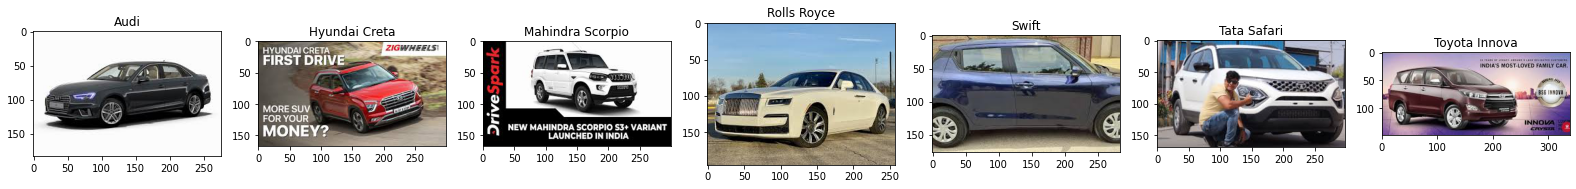

In [8]:
# Inspect the data
num_row = 1
num_col = 7
fig, axes = plt.subplots(num_row, num_col, figsize=(22,4))
for i in range(num_row*num_col):
  if i < len(labels):
    class_imgs = next(os.walk('{}/train/{}/'.format(dataset_dir, labels[i])))[2]
    class_img = class_imgs[0]
    img = Image.open('{}/train/{}/{}'.format(dataset_dir, labels[i], class_img))
    ax = axes[i%num_col]
    ax.imshow(np.array(img))
    ax.set_title('{}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [27]:
# Create an instance of ImageDataGenerator with NO Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

noaug_train_data_gen = ImageDataGenerator(rescale=1/255.)#,validation_split = 0.3) # rescale value is multiplied to the image
valid_data_gen = ImageDataGenerator(rescale=1/255.)
test_data_gen = ImageDataGenerator(rescale=1/255.)

# Obtain a data generator with the 'ImageDataGenerator.flow_from_directory' method
noaug_train_gen = noaug_train_data_gen.flow_from_directory(directory=training_dir,
                                                           target_size=(256,256),
                                                           color_mode='rgb',
                                                           classes=None, # can be set to labels
                                                           class_mode='categorical',
                                                           batch_size=8,
                                                           shuffle=True,
                                                           seed=seed)
                                                           #subset = 'training')
valid_gen = valid_data_gen.flow_from_directory(directory=validation_dir,
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               classes=None, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=8,
                                               shuffle=False,
                                               seed=seed)
                                               #subset = 'validation')
test_gen = test_data_gen.flow_from_directory(directory=test_dir,
                                             target_size=(256,256),
                                             color_mode='rgb',
                                             classes=None, # can be set to labels
                                             class_mode='categorical',
                                             batch_size=8,
                                             shuffle=False,
                                             seed=seed)

Found 1890 images belonging to 7 classes.
Found 231 images belonging to 7 classes.
Found 245 images belonging to 7 classes.


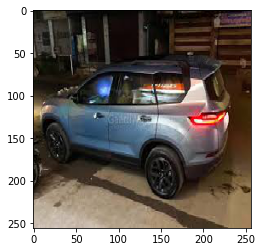

In [10]:
# Get sample image
image = next(noaug_train_gen)[0][4]
plt.imshow(image)

In [11]:
print("Assigned labels")
print(noaug_train_gen.class_indices)
print()
print("Target classes")
print(noaug_train_gen.classes)

Assigned labels
{'Audi': 0, 'Hyundai Creta': 1, 'Mahindra Scorpio': 2, 'Rolls Royce': 3, 'Swift': 4, 'Tata Safari': 5, 'Toyota Innova': 6}

Target classes
[0 0 0 ... 6 6 6]


In [30]:
# Create an instance of ImageDataGenerator with Data Augmentation
aug_train_data_gen = ImageDataGenerator(#rotation_range=5,
                                        height_shift_range=20,
                                        width_shift_range=20,
                                        zoom_range=0.3,
                                        brightness_range=(0.2, 0.8),
                                        #horizontal_flip=True,
                                        vertical_flip=False, 
                                        fill_mode='reflect',
                                        rescale=1/255.) # rescale value is multiplied to the image

# Obtain a data generator with the 'ImageDataGenerator.flow_from_directory' method
aug_train_gen = aug_train_data_gen.flow_from_directory(directory=training_dir,
                                                       target_size=(256,256),
                                                       color_mode='rgb',
                                                       classes=None, # can be set to labels
                                                       class_mode='categorical',
                                                       batch_size=8,
                                                       shuffle=True,
                                                       seed=seed)

Found 1890 images belonging to 7 classes.


In [31]:
input_shape = (256, 256, 3)
epochs = 200

In [32]:
# Model used for the exercise:
# (Conv + ReLU + MaxPool) x 5 + FC x 2
def build_model(input_shape):

    input_layer = tfkl.Input(input_shape,name='input')

    conv1 = tfkl.Conv2D(
        filters=16,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(input_layer)

    maxPool1 = tfkl.MaxPool2D(
        pool_size = (2, 2) 
    )(conv1)

    conv2 = tfkl.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(maxPool1)

    maxPool2 = tfkl.MaxPool2D(
        pool_size = (2, 2) 
    )(conv2)

    conv3 = tfkl.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(maxPool2)

    maxPoo3 = tfkl.MaxPool2D(
        pool_size = (2, 2) 
    )(conv3)

    conv4 = tfkl.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(maxPoo3)
    maxPool4 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(conv4)

    conv5 = tfkl.Conv2D(
        filters=256,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.GlorotUniform(seed)
    )(maxPool4)
    maxPool5 = tfkl.MaxPooling2D(
        pool_size = (2, 2)
    )(conv5)

    flattening_layer = tfkl.Flatten(name='Flatten')(maxPool5)
    flattening_layer = tfkl.Dropout(0.3, seed=seed)(flattening_layer)
    classifier_layer = tfkl.Dense(units=256, name='Classifier', kernel_initializer=tfk.initializers.GlorotUniform(seed), activation='relu')(flattening_layer)
    classifier_layer = tfkl.Dropout(0.3, seed=seed)(classifier_layer)
    output_layer = tfkl.Dense(units=7, activation='softmax', kernel_initializer=tfk.initializers.GlorotUniform(seed), name='Output')(classifier_layer)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')
    # Return the model
    return model

In [33]:
# Build model (for NO augmentation training)
model = build_model(input_shape)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 64)        18496 

In [34]:
# Utility function to create folders and callbacks for training
from datetime import datetime

def create_folders_and_callbacks(model_name):

  exps_dir = os.path.join('data_augmentation_experiments')
  if not os.path.exists(exps_dir):
      os.makedirs(exps_dir)

  now = datetime.now().strftime('%b%d_%H-%M-%S')

  exp_dir = os.path.join(exps_dir, model_name + '_' + str(now))
  if not os.path.exists(exp_dir):
      os.makedirs(exp_dir)
      
  callbacks = []

  # Model checkpoint
  # ----------------
  ckpt_dir = os.path.join(exp_dir, 'ckpts')
  if not os.path.exists(ckpt_dir):
      os.makedirs(ckpt_dir)

  ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp.ckpt'), 
                                                     save_weights_only=False, # True to save only weights
                                                     save_best_only=False) # True to save only the best epoch 
  callbacks.append(ckpt_callback)

  # Visualize Learning on Tensorboard
  # ---------------------------------
  tb_dir = os.path.join(exp_dir, 'tb_logs')
  if not os.path.exists(tb_dir):
      os.makedirs(tb_dir)
      
  # By default shows losses and metrics for both training and validation
  tb_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_dir, 
                                               profile_batch=0,
                                               histogram_freq=1)  # if > 0 (epochs) shows weights histograms
  callbacks.append(tb_callback)

  # Early Stopping
  # --------------
  es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
  callbacks.append(es_callback)

  return callbacks

In [35]:
# Create folders and callbacks and fit
noaug_callbacks = create_folders_and_callbacks(model_name='CNN_NoAug')

# Train the model
history = model.fit(
    x = noaug_train_gen,
    epochs = epochs,
    validation_data = valid_gen,
    callbacks = noaug_callbacks
).history

Epoch 1/200
237/237 [==============================] - 12s 46ms/step - loss: 1.9491 - accuracy: 0.1476 - val_loss: 1.9343 - val_accuracy: 0.1602
Epoch 2/200
237/237 [==============================] - 11s 45ms/step - loss: 1.9250 - accuracy: 0.1852 - val_loss: 1.9161 - val_accuracy: 0.2208
Epoch 3/200
237/237 [==============================] - 11s 47ms/step - loss: 1.8970 - accuracy: 0.1831 - val_loss: 1.8863 - val_accuracy: 0.1948
Epoch 4/200
237/237 [==============================] - 11s 44ms/step - loss: 1.8602 - accuracy: 0.2360 - val_loss: 1.8134 - val_accuracy: 0.2944
Epoch 5/200
237/237 [==============================] - 11s 47ms/step - loss: 1.7841 - accuracy: 0.2899 - val_loss: 1.7529 - val_accuracy: 0.3074
Epoch 6/200
237/237 [==============================] - 11s 45ms/step - loss: 1.6508 - accuracy: 0.3646 - val_loss: 1.6363 - val_accuracy: 0.3550
Epoch 7/200
237/237 [==============================] - 11s 47ms/step - loss: 1.4922 - accuracy: 0.4354 - val_loss: 1.5332 - val_ac

In [36]:
# Save best epoch model
model.save("data_augmentation_experiments/CNN_NoAug_Best")

In [37]:
# Build model (for data augmentation training)
model = build_model(input_shape)

In [38]:
#tf.get_logger().setLevel('WARNING') #  if you want to suppress only INFOs
# tf.get_logger().setLevel('ERROR') #  if you want to suppress both WARNINGs and INFOs

# Create folders and callbacks and fit
aug_callbacks = create_folders_and_callbacks(model_name='CNN_Aug')

# Train the model
history = model.fit(
    x = aug_train_gen,
    epochs = epochs,
    validation_data = valid_gen,
    callbacks = aug_callbacks
).history

Epoch 1/200
237/237 [==============================] - 40s 164ms/step - loss: 1.9486 - accuracy: 0.1233 - val_loss: 1.9460 - val_accuracy: 0.1429
Epoch 2/200
237/237 [==============================] - 38s 162ms/step - loss: 1.9465 - accuracy: 0.1339 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 3/200
237/237 [==============================] - 39s 163ms/step - loss: 1.9463 - accuracy: 0.1376 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 4/200
237/237 [==============================] - 38s 162ms/step - loss: 1.9465 - accuracy: 0.1307 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 5/200
237/237 [==============================] - ETA: 0s - loss: 1.9465 - accuracy: 0.1339

KeyboardInterrupt: ignored

In [ ]:
# Tuning of the data augmentation


# Obtain a data generator with the 'ImageDataGenerator.flow_from_directory' method
aug_train_gen = aug_train_data_gen.flow_from_directory(directory=training_dir,
                                                       target_size=(256,256),
                                                       color_mode='rgb',
                                                       classes=None, # can be set to labels
                                                       class_mode='categorical',
                                                       batch_size=8,
                                                       shuffle=True,
                                                       seed=seed)

Found 1890 images belonging to 7 classes.


In [ ]:
# tuning the value for data aug -> the probelm is that the results of the original
# data were ways better than the aug one

# BRIGHTNESS_RANGE
EPOCHS = 5

# brightness_range=(a, b)
a = np.arange(0,3,0.4)

my_list =[(1,1)]
for ala in a:
  for ele in a:
    if(ala < ele):
      my_list.append((ala,ele))


# Storing the average of all predictions
histories = []


for ele in my_list:

    s = 'brightness_range = (' + str(ele[0]) + ' , ' + str(ele[1]) + ')'
    print(s)

    aug_train_data_gen = ImageDataGenerator(#rotation_range=5,
                                        #height_shift_range=20,
                                        #width_shift_range=20,
                                        #zoom_range=0.3,
                                        brightness_range=(ele[0], ele[1]),
                                        #horizontal_flip=True,
                                        #vertical_flip=False, 
                                        fill_mode='reflect',
                                        rescale=1/255.) # rescale value is multiplied to the image

    aug_train_gen = aug_train_data_gen.flow_from_directory(directory=training_dir,
                                                       target_size=(256,256),
                                                       color_mode='rgb',
                                                       classes=None, # can be set to labels
                                                       class_mode='categorical',
                                                       batch_size=8,
                                                       shuffle=True,
                                                       seed=seed)

    model = build_model(input_shape)

    history = model.fit(  aug_train_gen,
                          validation_data=valid_gen,
                          epochs = EPOCHS
                          )

    #model_aug_test_metrics = model.evaluate(test_gen, return_dict=True)

    histories.append(history)

max_val_accuracy = 0
iterAt = 0
max_after_5 = []
for iter,hist in enumerate(histories):
  new = hist.history["val_accuracy"][-1]
  max_after_5.append(new)
  if new > max_val_accuracy:
    max_val_accuracy = new
    iterAt = iter

print(iterAt)
print(my_list[iterAt])
print(max_val_accuracy)
print(max_after_5)


In [132]:
# tuning the value for data aug -> the probelm is that the results of the original
# data were ways better than the aug one

# HEIGHT_SHIFT_RANGE 
EPOCHS = 5
a = np.arange(0,1,0.0.5)
my_list =[a]

# Storing the average of all predictions
histories = []


for ele in my_list:

    s = 'height_shift_range = ' + str(ele)
    print(s)

    aug_train_data_gen = ImageDataGenerator(#rotation_range=5,
                                        height_shift_range=ele,
                                        #width_shift_range=20,
                                        #zoom_range=0.3,
                                        #brightness_range=(ele[0], ele[1]),
                                        #horizontal_flip=True,
                                        #vertical_flip=False, 
                                        fill_mode='reflect',
                                        rescale=1/255.) # rescale value is multiplied to the image

    aug_train_gen = aug_train_data_gen.flow_from_directory(directory=training_dir,
                                                       target_size=(256,256),
                                                       color_mode='rgb',
                                                       classes=None, # can be set to labels
                                                       class_mode='categorical',
                                                       batch_size=8,
                                                       shuffle=True,
                                                       seed=seed)

    model = build_model(input_shape)

    history = model.fit( 
                          aug_train_gen,
                          validation_data=valid_gen,
                          epochs = EPOCHS)
    
    histories.append(history)

max_val_accuracy = 0
iterAt = 0
for iter,hist in enumerate(histories):
  new = hist.history["val_accuracy"][-1]
  if new > max_val_accuracy:
    max_val_accuracy = new
    iterAt = iter

print(iterAt)
print(my_list[iterAt])
print(max_val_accuracy)

13
(0.8, 1.6)
0.3549783527851105


In [115]:
histories[0].__dict__

{'validation_data': None,
 'model': <keras.engine.functional.Functional at 0x7fd1951f3e50>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [1.9374150037765503,
   1.9393277168273926,
   1.9468672275543213,
   1.9464564323425293,
   1.9465326070785522],
  'accuracy': [0.16137565672397614,
   0.1417989432811737,
   0.13227513432502747,
   0.13227513432502747,
   0.1269841343164444],
  'val_loss': [1.9017934799194336,
   1.9462224245071411,
   1.946044683456421,
   1.9459545612335205,
   1.9459224939346313],
  'val_accuracy': [0.21212121844291687,
   0.1428571492433548,
   0.1428571492433548,
   0.1428571492433548,
   0.1428571492433548]},
 'params': {'verbose': 1, 'epochs': 5, 'steps': 237},
 'epoch': [0, 1, 2, 3, 4]}

In [25]:
# Save best epoch model
model.save("data_augmentation_experiments/CNN_Aug_Best")

In [26]:
# Evaluate on test
# Trainined with no data augmentation
model_noaug = tfk.models.load_model("data_augmentation_experiments/CNN_NoAug_Best")
model_noaug_test_metrics = model_noaug.evaluate(test_gen, return_dict=True)
# Trained with data augmentation
model_aug = tfk.models.load_model("data_augmentation_experiments/CNN_Aug_Best")
model_aug_test_metrics = model_aug.evaluate(test_gen, return_dict=True)

print()
print("Test metrics without data augmentation")
print(model_noaug_test_metrics)
print("Test metrics with data augmentation")
print(model_aug_test_metrics)

31/31 [==============================] - 1s 27ms/step - loss: 1.9459 - accuracy: 0.1429

Test metrics without data augmentation
{'loss': 1.394432544708252, 'accuracy': 0.4938775599002838}
Test metrics with data augmentation
{'loss': 1.9459105730056763, 'accuracy': 0.1428571492433548}


Found 1890 images belonging to 7 classes.
Transform: {'theta': 0, 'tx': 0, 'ty': 0, 'shear': 0, 'zx': 1, 'zy': 1, 'flip_horizontal': 0, 'flip_vertical': 0, 'channel_shift_intensity': None, 'brightness': 1.5360121163771898}


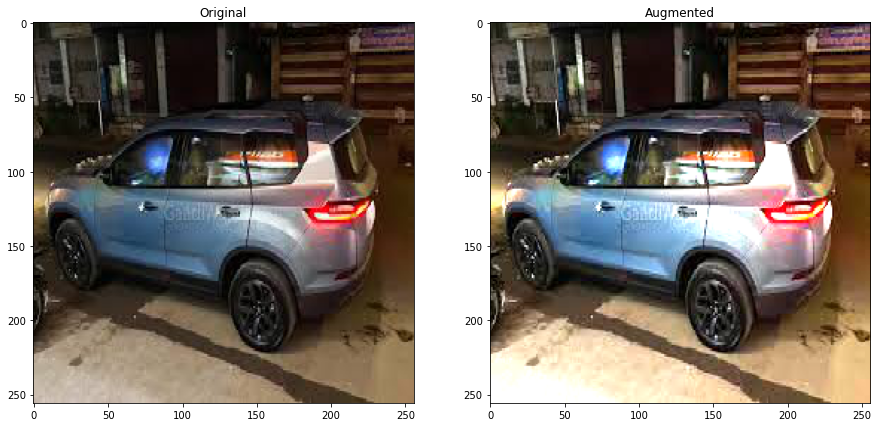

In [79]:
train_data_gen = ImageDataGenerator()

train_gen = train_data_gen.flow_from_directory(directory=training_dir,
                                               target_size=(256,256),
                                               shuffle=True,
                                               seed=seed)
                                            
image = next(train_gen)[0][4]

# see transformation
gen = ImageDataGenerator(brightness_range=(3, 1),
                         fill_mode='reflect')

# Get random transformation
t = gen.get_random_transform(img_shape=(256, 256), seed=seed)
print("Transform:", t)

# Apply the transformation
augmented = gen.apply_transform(image, t)

# Plot original and augmented images
fig, ax = plt.subplots(1, 2, figsize=(15,30))
ax[0].imshow(np.uint8(image))
ax[0].set_title("Original")
ax[1].imshow(np.uint8(augmented))
ax[1].set_title("Augmented")
plt.show()